## **Regresión lineal por gradiente descendiente**
Daniel Velasco Rodriguez 2215456

### Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataframe = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'ModelYear', 'Origin']

raw_dataset = pd.read_csv(dataframe, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()


dataset.head(4)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1


#### Verificamos valores vacios en el dataset.

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

#### Eliminamos filas donde existen valores vacios.

In [ ]:
dataset = dataset.dropna(axis = 0)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [ ]:
dataset.shape

(392, 8)

#### Normalizamos los datos y creamos nuevo dataset

In [ ]:
Displacement = dataset.iloc[:, 2].values
Horsepower = dataset.iloc[:, 3].values
Weight = dataset.iloc[:, 4].values
Acceleration = dataset.iloc[:, 5].values
ModelYear = dataset.iloc[:, 6].values
Origin = dataset.iloc[:, 7].values

MPG = dataset.iloc[:, 0].values


In [ ]:
new_dataset = np.zeros((392,7))
new_dataset[:, 0] = Displacement
new_dataset[:, 1] = Horsepower
new_dataset[:, 2] = Weight
new_dataset[:, 3] = Acceleration
new_dataset[:, 4] = ModelYear
new_dataset[:, 5] = Origin
new_dataset[:, 6] = MPG
print(new_dataset[:5,:])

[[3.070e+02 1.300e+02 3.504e+03 1.200e+01 7.000e+01 1.000e+00 1.800e+01]
 [3.500e+02 1.650e+02 3.693e+03 1.150e+01 7.000e+01 1.000e+00 1.500e+01]
 [3.180e+02 1.500e+02 3.436e+03 1.100e+01 7.000e+01 1.000e+00 1.800e+01]
 [3.040e+02 1.500e+02 3.433e+03 1.200e+01 7.000e+01 1.000e+00 1.600e+01]
 [3.020e+02 1.400e+02 3.449e+03 1.050e+01 7.000e+01 1.000e+00 1.700e+01]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

norm_dataset = scaler.fit_transform(new_dataset)

In [ ]:
norm_dataset.shape

(392, 7)

In [ ]:
print(norm_dataset)

[[0.61757106 0.45652174 0.5361497  ... 0.         0.         0.2393617 ]
 [0.72868217 0.64673913 0.58973632 ... 0.         0.         0.15957447]
 [0.64599483 0.56521739 0.51686986 ... 0.         0.         0.2393617 ]
 ...
 [0.17312661 0.20652174 0.19336547 ... 1.         0.         0.61170213]
 [0.13436693 0.17934783 0.2869294  ... 1.         0.         0.50531915]
 [0.13178295 0.19565217 0.31386447 ... 1.         0.         0.58510638]]


#### Datos de entrenamiento y validación 




*Entrenamiento (80%) - 313 filas, 3 columnas*


In [ ]:
x_train = norm_dataset[0:313, 0:3]
# print(x_train[0:5, :])
x_train.shape

y_train = norm_dataset[0:313,3]
y_train = y_train.reshape(313,1)
# print(y_train[0:5,:])
# y_train.shape

*Validación (20%) - 79 filas, 1 columna*

In [ ]:
x_test = norm_dataset[313:, 0:3]
# print(x_test[0:5, :])

y_test = norm_dataset[313:,3]
y_test = y_test.reshape(79,1)
# print(y_test[0:5,:])

### Regresión lineal una variable

In [ ]:
# x = dataset[['Displacement','Horsepower','Weight']].values

x = norm_dataset[:,0] #Displacement 
y = norm_dataset[:,6] #MPG


Defining independent and dependent variable


In [ ]:
x.shape

(392,)

Displaying data distribution


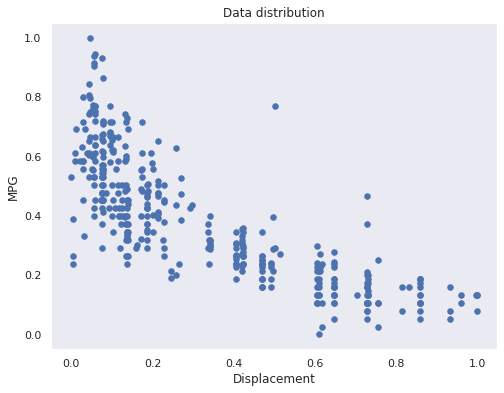

In [ ]:
print('Displaying data distribution')
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y, s=30)
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid()
plt.show()

In [ ]:

m = 0 #theta0
b = 0 #theta1
# theta2 = 0
# theta3 = 0

Initializing m and b


In [ ]:

x_line = np.linspace(0,10,100)
y_line = b + m*x_line 


Displaying the regression line before being trained


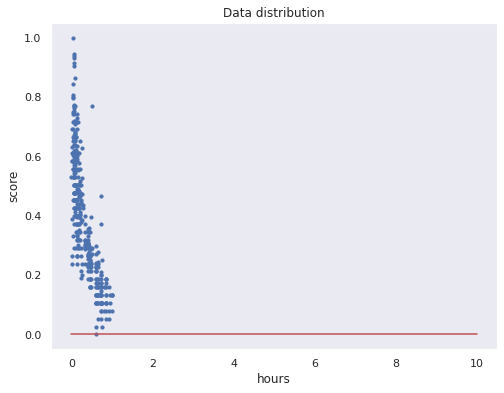

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y, s=10)
plt.plot(x_line,y_line, c='r')
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

In [ ]:

L = 0.001
epochs = 15000

Defining learning rate and the number of epochs


In [ ]:
n = float(x.shape[0])

# An empty list to store the error in each epoch
losses = []
for i in range(epochs):
    yhat = m*x + b
    
    # Keeping track of the error decrease
    mse = (1/n) * np.sum((y - yhat)**2)
    losses.append(mse)
    
    # Derivatives
    dm = (-2/n) * np.sum(x * (y - yhat))
    db = (-2/n) * np.sum(y - yhat)
    
    # Values update
    m = m - L*dm   #theta0
    b = b - L*db   #theta1

In [ ]:
print(m)
print(b)

-0.5151755120235462
0.550125627313855


Displaying linear regression line after training


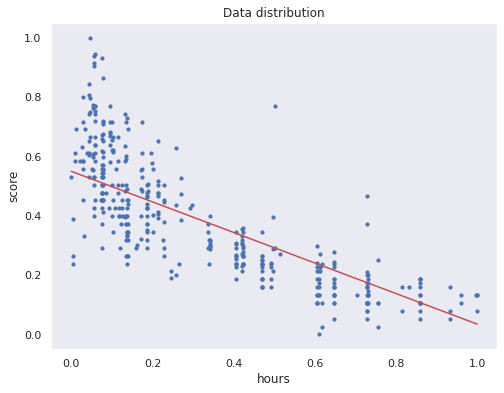

In [ ]:

x_line = np.linspace(0,1,100)
y_line = m*x_line + b
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.plot(x_line, y_line, c='r')
plt.scatter(x, y, s=10)
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid()
plt.show()

Displaying loss value decrease
Initial loss	: 0.1905891352976229
Final loss	: 0.015896983434311843


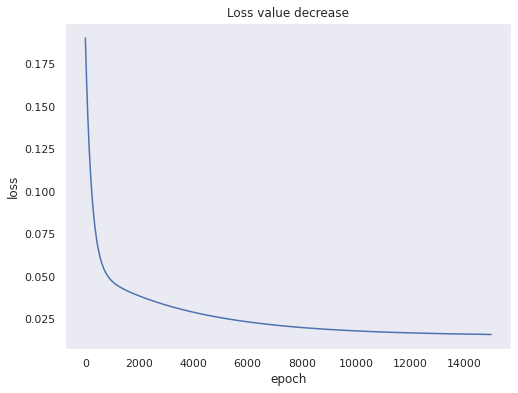

In [ ]:
print('Displaying loss value decrease')
plt.figure(figsize=(8,6))
plt.title('Loss value decrease')
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
print('Initial loss\t:', losses[0])
print('Final loss\t:', losses[-1])
plt.grid()
plt.show()

### Regresión lineal multivariable


#### Modelo 1

In [ ]:

norm_dataframe = pd.DataFrame({'Displacement': norm_dataset[:,0] ,
                  'Horsepower': norm_dataset[:, 1],
                  'Weight' : norm_dataset[:, 2],
                  'Acceleration' : norm_dataset[:, 3],
                  'ModelYear' : norm_dataset[:, 4],
                  'Origin' : norm_dataset[:, 5],
                  'MPG': norm_dataset[:, 6]})





In [ ]:
norm_dataframe.head()

,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,MPG
0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.239362
1,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.159574
2,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.239362
3,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.186170
4,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.212766


In [ ]:

x1 =norm_dataframe['Displacement'].values
x2 = norm_dataframe['Horsepower'].values
x3 =norm_dataframe['Weight'].values
y = norm_dataframe['MPG'].values

Defining independent and dependent variable


Displaying data distribution


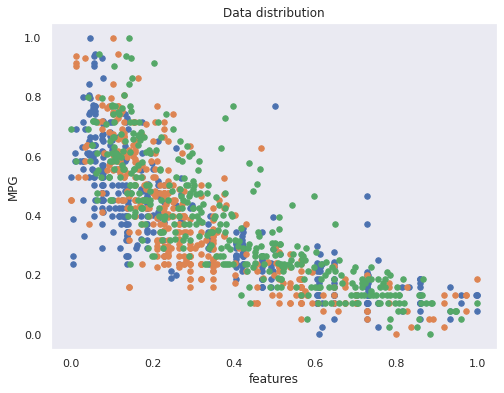

In [ ]:

plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x1,y, s=30)
plt.scatter(x2,y, s=30)
plt.scatter(x3,y, s=30)
plt.xlabel('features')
plt.ylabel('MPG')
plt.grid()
plt.show()

In [ ]:
theta0 = 0 #b
theta1 = 0 #m
theta2 = 0
theta3 = 0

Initializing m and b


In [ ]:

x_line = np.linspace(0,10,100)
y_line = theta0 + theta1*x_line + theta2*x_line + theta3*x_line

Displaying the regression line before being trained


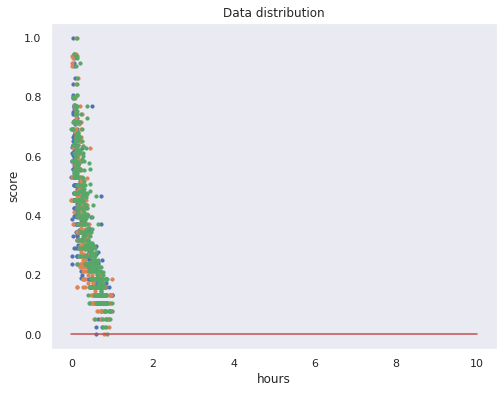

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x1, y, s=10)
plt.scatter(x2, y, s=10)
plt.scatter(x3, y, s=10)
plt.plot(x_line,y_line, c='r')
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

In [ ]:
print('Defining learning rate and the number of epochs')
L1 = 0.01
epochs1 = 25000

Defining learning rate and the number of epochs


In [ ]:
n = np.float(x.shape[0])
# An empty list to store the error in each epoch
losses1 = []
for i in range(epochs1):
    yhat = theta0 + theta1*x1 + theta2*x2 + theta3*x3


    # Keeping track of the error decrease
    mse = (1/n) * np.sum((y - yhat)**2)
    losses1.append(mse)
    
    # Derivatives
    dtheta0 = (-2/n) * np.sum(y - yhat)
    dtheta1 = (-2/n) * np.sum(x1 * (y - yhat))
    dtheta2 = (-2/n) * np.sum(x2 * (y - yhat))
    dtheta3 = (-2/n) * np.sum(x3 * (y - yhat))
    
    # Values update
    theta0 = theta0 - L1*dtheta0
    theta1 = theta1 - L1*dtheta1
    theta2 = theta2 - L1*dtheta2
    theta3 = theta3 - L1*dtheta3

In [ ]:
print(theta0)
print(theta1)
print(theta2)
print(theta3)

0.6584753192120433
-0.09595712121721911
-0.192890664914866
-0.4695139951236683


$\hat{y} = 0.658475 -0.0959571x_1 -0.1928906x_2 -0.4695139x_3$

Displaying linear regression line after training


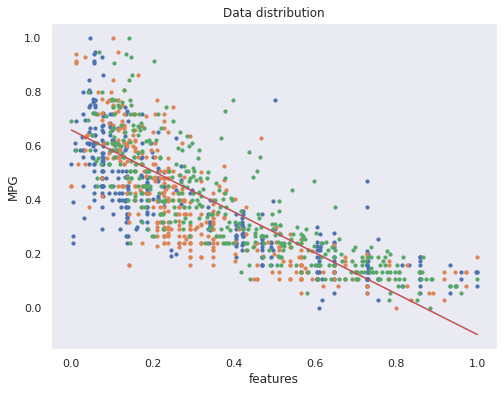

In [ ]:
print('Displaying linear regression line after training')
x_line = np.linspace(0,1,100)
y_line = theta0 + theta1*x_line + theta2*x_line + theta3*x_line
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.plot(x_line, y_line, c='r')
plt.scatter(x1, y, s=10)
plt.scatter(x2, y, s=10)
plt.scatter(x3, y, s=10)
plt.xlabel('features')
plt.ylabel('MPG')
plt.grid()
plt.show()

Displaying loss value decrease
Initial loss	: 0.1905891352976229
Final loss	: 0.012605119207658807


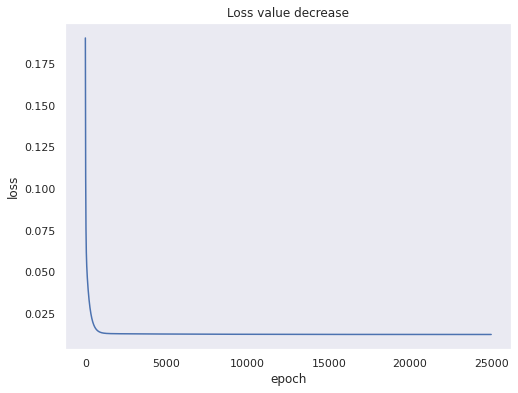

In [ ]:
print('Displaying loss value decrease')
plt.figure(figsize=(8,6))
plt.title('Loss value decrease')
plt.plot(losses1)
plt.ylabel('loss')
plt.xlabel('epoch')
print('Initial loss\t:', losses1[0])
print('Final loss\t:', losses1[-1])
plt.grid()
plt.show()

#### Modelo 2

In [ ]:
norm_dataframe.head()

,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,MPG
0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.239362
1,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.159574
2,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.239362
3,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.186170
4,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.212766


In [ ]:
x21 =norm_dataframe['Acceleration'].values
x22 = norm_dataframe['ModelYear'].values
x23 =norm_dataframe['Origin'].values
y2 = norm_dataframe['MPG'].values

Defining independent and dependent variable


Displaying data distribution


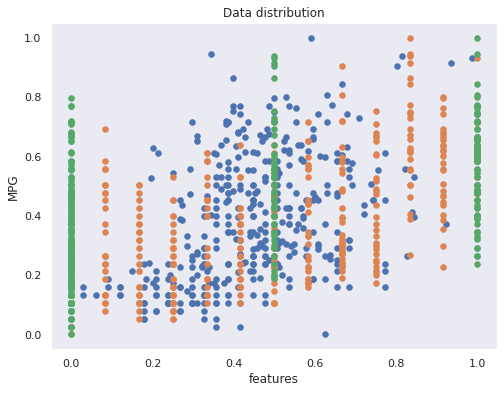

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x21,y2, s=30)
plt.scatter(x22,y2, s=30)
plt.scatter(x23,y2, s=30)
plt.xlabel('features')
plt.ylabel('MPG')
plt.grid()
plt.show()

In [ ]:
theta20 = 0 #b
theta21 = 0 #m
theta22 = 0
theta23 = 0

Initializing m and b


In [ ]:
x_line2 = np.linspace(0,1,100)
y_line2 = theta20 + theta21*x_line + theta22*x_line + theta23*x_line

Displaying the regression line before being trained


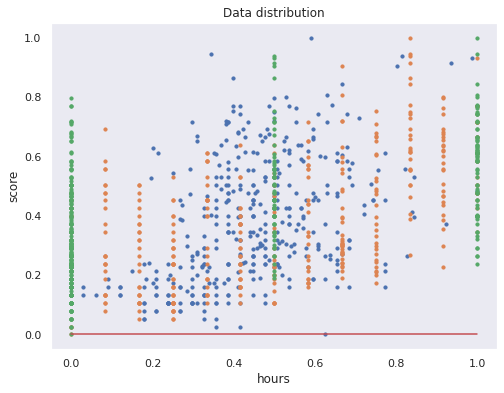

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x21, y2, s=10)
plt.scatter(x22, y2, s=10)
plt.scatter(x23, y2, s=10)
plt.plot(x_line2,y_line2, c='r')
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

In [ ]:
print('Defining learning rate and the number of epochs')
L2 = 0.001
epochs2 = 15000

Defining learning rate and the number of epochs


In [ ]:
n = np.float(x.shape[0])
# An empty list to store the error in each epoch
losses2 = []
for i in range(epochs2):
    yhat2 = theta20 + theta21*x21 + theta22*x22 + theta23*x23


    # Keeping track of the error decrease
    mse2 = (1/n) * np.sum((y2 - yhat2)**2)
    losses2.append(mse2)
    
    # Derivatives
    dtheta20 = (-2/n) * np.sum(y2 - yhat2)
    dtheta21 = (-2/n) * np.sum(x21 * (y2 - yhat2))
    dtheta22 = (-2/n) * np.sum(x22 * (y2 - yhat2))
    dtheta23 = (-2/n) * np.sum(x23 * (y2 - yhat2))
    
    # Values update
    # m = m - L*dm
    # b = b - L*db
    theta20 = theta20 - L2*dtheta20
    theta21 = theta21 - L2*dtheta21
    theta22 = theta22 - L2*dtheta22
    theta23 = theta23 - L2*dtheta23

In [ ]:
print(theta20)
print(theta21)
print(theta22)
print(theta23)

0.09722656072137616
0.17154786382714407
0.28898955902434575
0.23384925337058438


$\hat{y} = 0.09722656072137616 + 0.17154x_1 + 0.2889895x_2 +0.23384925x_3$


Displaying linear regression line after training


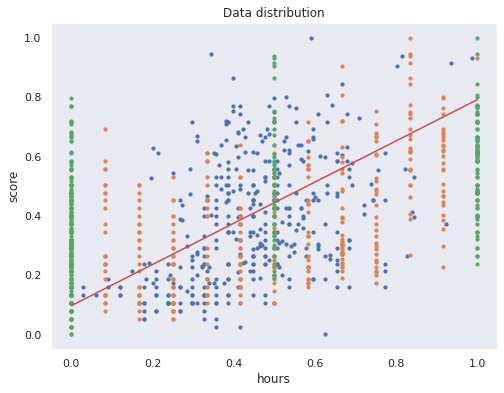

In [ ]:
x_line2 = np.linspace(0,1,100)
y_line2 = theta20 + theta21*x_line2 + theta22*x_line2 + theta23*x_line2
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.plot(x_line2, y_line2, c='r')
plt.scatter(x21, y, s=10)
plt.scatter(x22, y, s=10)
plt.scatter(x23, y, s=10)
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

Displaying loss value decrease
Initial loss	: 0.1905891352976229
Final loss	: 0.017760961734952785


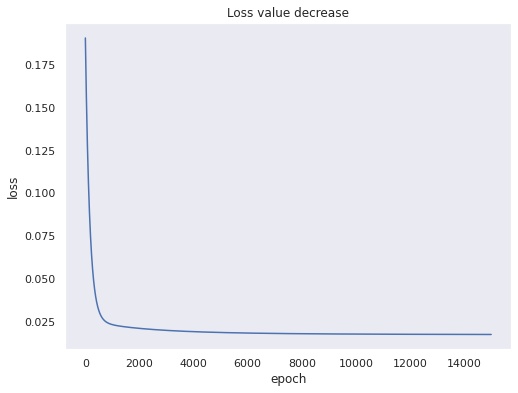

In [ ]:
print('Displaying loss value decrease')
plt.figure(figsize=(8,6))
plt.title('Loss value decrease')
plt.plot(losses2)
plt.ylabel('loss')
plt.xlabel('epoch')
print('Initial loss\t:', losses2[0])
print('Final loss\t:', losses2[-1])
plt.grid()
plt.show()

In [ ]:
y_hat_train = 40.7464  - 0.0056 * x_train[:,0] - 0.022158 * x_train[:,1] - 0.005087* x_train[:,2]
y_hat_train = y_hat_train.reshape(313,1)


# MSE
sum = 0
for i in range(313):
    sum = sum + (y_train[i, :] - y_hat_train[i, :]) ** 2

mse_train = sum / 313

print("MSE entrenamiento: ",mse_train)


In [ ]:
y_hat_test = 40.7464  - 0.0056 * x_test[:,0] - 0.022158 * x_test[:,1] - 0.005087* x_test[:,2]
y_hat_test = y_hat_test.reshape(79,1)


# MSE
sum = 0
for i in range(79):
    sum = sum + (y_test[i, :] - y_hat_test1[i, :]) ** 2

mse_test = sum / 79

print("MSE validación: ",mse_test)

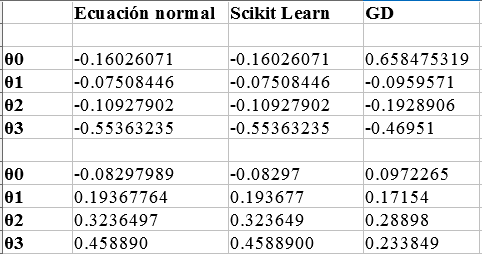